In [1]:
# tensorflow
import tensorflow as tf
from tensorflow import keras

# helpers
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.style.use('sciml-style')

## Step 0

To start with we set up our data and look at the dataset.

During many of examples in these lectures we will work with the `fashion-mnist` dataset. This is useful for quick examples when learning the basics. When you come to the exercises you will use the same principles to work with more relevant datasets.

In [2]:
##### tool functions #####

# plot an image in a subplot
def subplot_image(image, label, nrows=1, ncols=1, iplot=0):
    plt.subplot(nrows, ncols, iplot + 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.xticks([])
    plt.yticks([])
    
# plot a bar chart in a subplot
def subplot_bar(data, true_label, nrows=1, ncols=1, iplot=0):
    plt.subplot(nrows, ncols, iplot + 1)
    chart = plt.bar(np.arange(len(data)), data, color='gray')
    predicted_label = np.argmax(data)
    chart[predicted_label].set_color('red')
    chart[true_label].set_color('green')
    plt.xticks(np.arange(len(data)))
    plt.yticks([])
    plt.ylim([0, 1])
    plt.gca().set_aspect(len(data))
    plt.title('Probability', fontsize=12)

In [3]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# normalise images
train_images = train_images / 255.0
test_images = test_images / 255.0

# string labels
string_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# info
print("number of training data: %d" % len(train_labels))
print("number of test data: %d" % len(test_labels))
print("image pixels: %s" % str(train_images[0].shape))

number of training data: 60000
number of test data: 10000
image pixels: (28, 28)


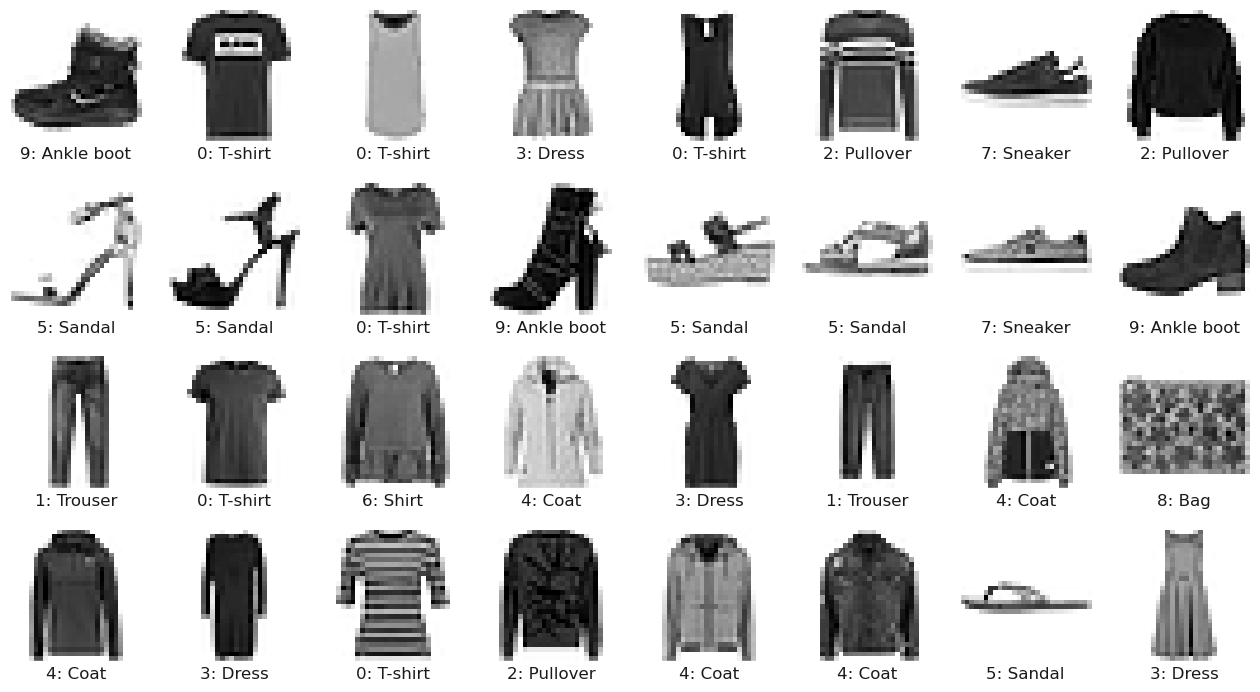

In [4]:
# plot data
nrows = 4
ncols = 8
plt.figure(dpi=100, figsize=(ncols * 2, nrows * 2.2))
for i in np.arange(nrows * ncols):
    title = "%d: %s" % (train_labels[i], string_labels[train_labels[i]])
    subplot_image(train_images[i], title, nrows, ncols, i)
plt.show()

## Step 1 Building the network architecture

Using the information and code snippits from the slides, we are now going to build a simple multi-layer perceptron to classify the `fashion-mnist` dataset. To build this network you will need

* Input layer
* Hidden layers
* Output layers
* All layers are `Dense` layers
* Layers require activation functions too

Note the we use different activation functions for different tasks. Remember that `ReLU` performs very well for training networks - there is a caveat, `ReLU` is *only* used in hidden layers. 

### The input layer

 You need to define the dimensionality of the input for the input layer. In this case we flatten (using a `Flatten` layer) the images above and feed them to the network. As they are $28 x 28$ images, the input size is 784.

### The hidden layers

For this network we will use just one hidden layer. It will be a `Dense` layer. This layer requires an activation function.

### Output layers

Remember from earliers lectures that we can cast categorical data as a `one-hot-vector`, in this case this is what we have. A vector of length 10, where each element corresponds to a type of apparel. We want our outputs to ideally be either 0 or 1, depending on class. If you rememeber our activation functions from the slides, this sounds like a `sigmoid` function

$S(x) = \frac{1}{1 + e^{-x}}$

```
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
```

In [5]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

You can take a look at the summary of your model using `model.summary()`

In [6]:
# print summary
model.summary()
# save initial weights
dnn_initial_weights = model.get_weights().copy()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Step 2 Compile and train your model

We start by compiling you model. This is where you specify all sorts of hyperparameters associated with the model. You need to choose an optimiser, recall from the slides we recommend *Adam* as a good generic choice. You also want an loss and some metrics.

### Loss

The loss is the value that is used to train the network, as in the slides, gradients of the loss with respect to weights are used to backpropagate and update the network weights. In this case we will use `SparseCategoricalCrossentropy` - the term *sparse* means that the output vector is sparse i.e. there are many more zeros than ones in the one hot encoding.

### Metric

The metrics do not feed into the training but are useful to monitor to get a sense of how the model is doing. You can also use them to choose between models at the end. In our case we will monitor the `accuracy`.

```
model.compile(optimizer='adam',
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
```

In [7]:
# compile model
model.compile(optimizer='adam',
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

## Step 3 Train the model

Now we can finally start to train the model on our data.

The model is trained using the `fit` method. We need to specificy a few extra parameters here

* Epochs: This is the number of times that the model will run through the entire training set during training
* Batch size: This determines how many images will be used at a time to update the weights. Backpropagation uses the mean of the losses across the batch to update weights.  Generally larger batches will train quicker and smoother, but can become trapped in local minima. Generally batch sizes between 16 - 256 are used, depending on data heterogeniety, memory available etc ..
* Validation split: we can automatically split the dataset into train and validate segments. Here we will use 20% for validation

```
training_history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.2)
```

In [8]:
training_history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 99us/sample - loss: 0.5447 - accuracy: 0.8091 - val_loss: 0.4302 - val_accuracy: 0.8475
Epoch 2/50
48000/48000 [==============================] - 4s 86us/sample - loss: 0.3933 - accuracy: 0.8604 - val_loss: 0.4022 - val_accuracy: 0.8527
Epoch 3/50
48000/48000 [==============================] - 4s 82us/sample - loss: 0.3502 - accuracy: 0.8753 - val_loss: 0.3600 - val_accuracy: 0.8677
Epoch 4/50
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3238 - accuracy: 0.8824 - val_loss: 0.3448 - val_accuracy: 0.8740
Epoch 5/50
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3036 - accuracy: 0.8883 - val_loss: 0.3577 - val_accuracy: 0.8688
Epoch 6/50
48000/48000 [==============================] - 4s 83us/sample - loss: 0.2894 - accuracy: 0.8942 - val_loss: 0.3368 - val_accuracy: 0.8774
Epoch 7/50
48000/48000 [==============================] 

Check the results. Plot the accuracy and the validation accuracy against training epoch
Notice that the values diverge as the model trains. This is a classic symptom of overfitting. We return to the slides to see how me might deal with this.
```
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
```

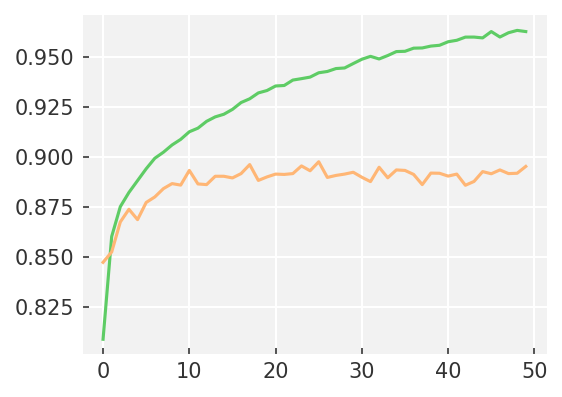

In [11]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])

## Step 4 Rgularise and re-train

As we saw above, the model was doing okay, but was overfitting a bit. From the slides we learned that we can use `dropout` to mitigate against overfitting. Here we will rebuild our model and include some dropout between the hidden and output layer. We can see if this negates the overfitting.

```
from tensorflow.keras.layers import Dropout

model_reg = Sequential()
model_reg.add(Flatten(input_shape=(28, 28)))
model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dropout(0.2))
model_reg.add(Dense(10, activation='sigmoid'))

```

compile and fit the model as before.

In [18]:
from tensorflow.keras.layers import Dropout

model_reg = Sequential()
model_reg.add(Flatten(input_shape=(28, 28)))
model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dropout(0.4))
model_reg.add(Dense(10, activation='sigmoid'))

In [19]:
# compile model
model_reg.compile(optimizer='adam',
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
training_history_reg = model_reg.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 87us/sample - loss: 0.6632 - accuracy: 0.7676 - val_loss: 0.4324 - val_accuracy: 0.8415
Epoch 2/50
48000/48000 [==============================] - 4s 79us/sample - loss: 0.4655 - accuracy: 0.8331 - val_loss: 0.4187 - val_accuracy: 0.8455
Epoch 3/50
48000/48000 [==============================] - 4s 80us/sample - loss: 0.4304 - accuracy: 0.8457 - val_loss: 0.3883 - val_accuracy: 0.8593
Epoch 4/50
48000/48000 [==============================] - 4s 82us/sample - loss: 0.4041 - accuracy: 0.8541 - val_loss: 0.3774 - val_accuracy: 0.8562
Epoch 5/50
48000/48000 [==============================] - 4s 88us/sample - loss: 0.3888 - accuracy: 0.8578 - val_loss: 0.3659 - val_accuracy: 0.8657
Epoch 6/50
48000/48000 [==============================] - 4s 87us/sample - loss: 0.3770 - accuracy: 0.8627 - val_loss: 0.3550 - val_accuracy: 0.8730
Epoch 7/50
48000/48000 [==============================] 

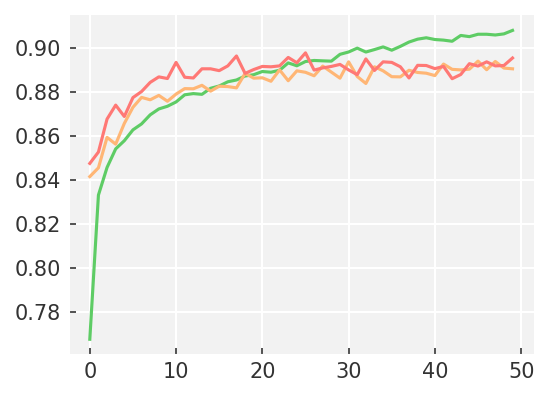

In [20]:
plt.plot(training_history_reg.history['accuracy'])
plt.plot(training_history_reg.history['val_accuracy'])
plt.plot(training_history.history['val_accuracy'])